In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
file_path = "D:\DAI-101\world_population.csv"
df = pd.read_csv(file_path)

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kanav\AppData\Local\Temp\ipykernel_19056\1722184551.py:5: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\DAI-101\world_population.csv"


Mode of Continent: Africa
Continent
Africa           24.358974
Asia             21.367521
Europe           21.367521
North America    17.094017
Oceania           9.829060
South America     5.982906
Name: proportion, dtype: float64


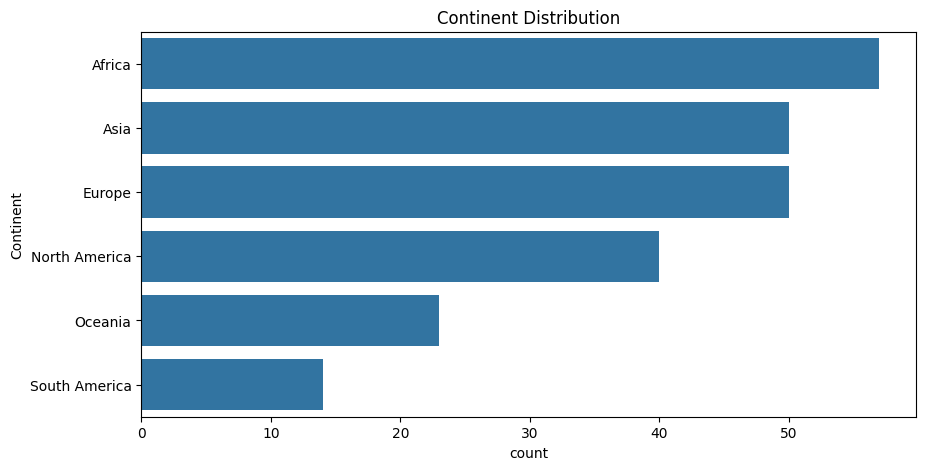

In [16]:
# Univariate Analysis
# Categorical: Continent Analysis

print("Mode of Continent:", df['Continent'].mode()[0])
print(df['Continent'].value_counts(normalize=True) * 100)

plt.figure(figsize=(10,5))
sns.countplot(y='Continent', data=df, order=df['Continent'].value_counts().index)
plt.title("Continent Distribution")
plt.show()



2022 Population Summary:
count    2.340000e+02
mean     3.407441e+07
std      1.367664e+08
min      5.100000e+02
25%      4.197385e+05
50%      5.559944e+06
75%      2.247650e+07
max      1.425887e+09
Name: 2022 Population, dtype: float64


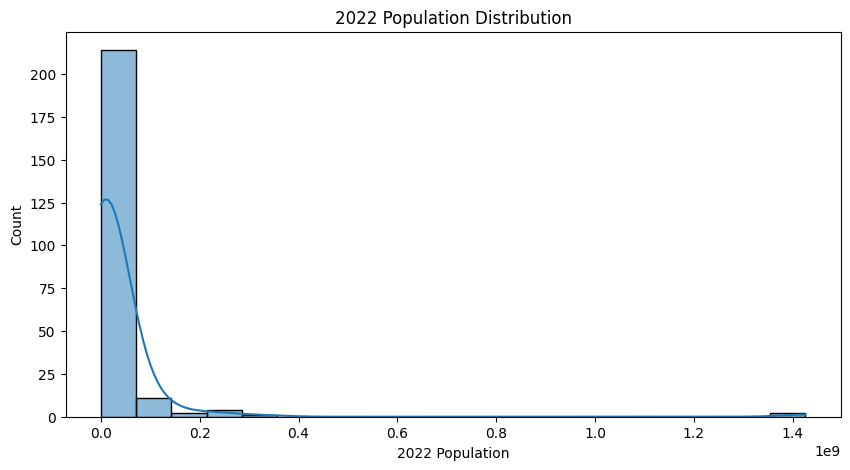

In [17]:
# Numerical: Population Analysis
print("2022 Population Summary:")
print(df['2022 Population'].describe())

plt.figure(figsize=(10,5))
sns.histplot(df['2022 Population'], bins=20, kde=True)
plt.title("2022 Population Distribution")
plt.show()



Five-Number Summary: 510 419738.5 5559944.5 22476504.75 1425887337


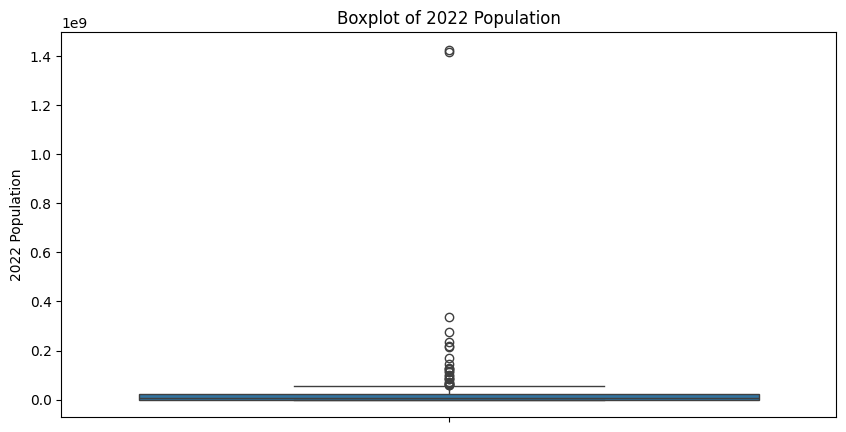

In [18]:
# Five-Number Summary & Boxplot
Q1 = df['2022 Population'].quantile(0.25)
Q3 = df['2022 Population'].quantile(0.75)
IQR = Q3 - Q1
print("Five-Number Summary:", df['2022 Population'].min(), Q1, df['2022 Population'].median(), Q3, df['2022 Population'].max())

plt.figure(figsize=(10,5))
sns.boxplot(y='2022 Population', data=df)
plt.title("Boxplot of 2022 Population")
plt.show()


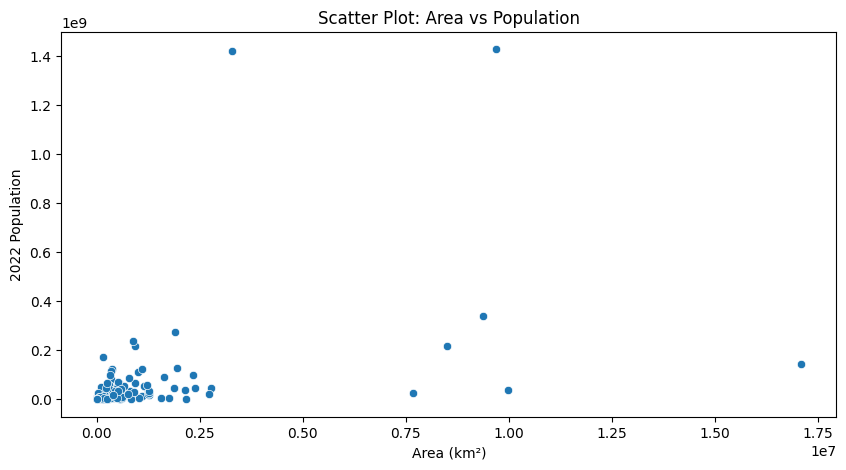

Correlation Matrix:
                  Area (km²)  2022 Population
Area (km²)         1.000000         0.453411
2022 Population    0.453411         1.000000


In [19]:
# Bivariate Analysis
# Numerical & Numerical: Scatter Plot and Correlation
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Area (km²)'], y=df['2022 Population'])
plt.title("Scatter Plot: Area vs Population")
plt.xlabel("Area (km²)")
plt.ylabel("2022 Population")
plt.show()

correlation = df[['Area (km²)', '2022 Population']].corr()
print("Correlation Matrix:\n", correlation)



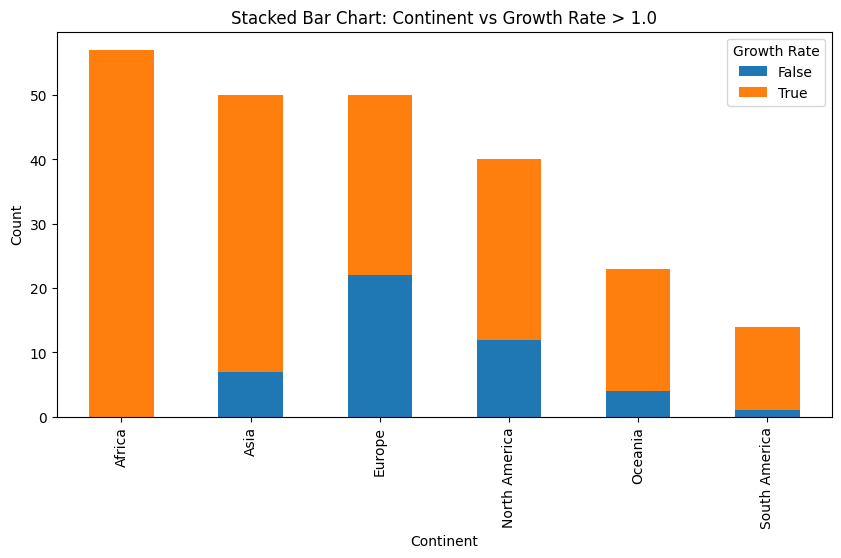

In [20]:
# Categorical & Categorical: Stacked Bar Chart and Chi-square Test
contingency_table = pd.crosstab(df['Continent'], df['Growth Rate'] > 1.0)
contingency_table.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Stacked Bar Chart: Continent vs Growth Rate > 1.0")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.show()



In [21]:
# Chi-square Test Calculation
observed = contingency_table.values
expected = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / contingency_table.sum().sum()
chi2_stat = ((observed - expected) ** 2 / expected).sum()
print("Chi-square Test Statistic:", chi2_stat)



Chi-square Test Statistic: 37.890706902396566


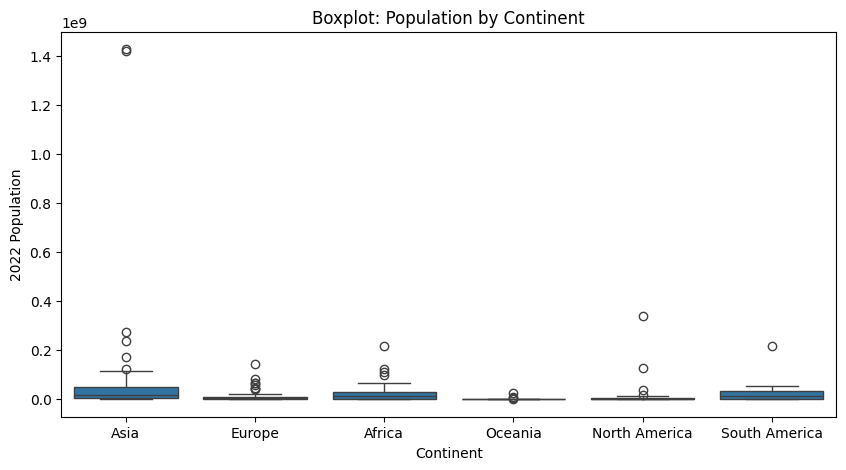

In [22]:
# Categorical & Numerical: Boxplot and ANOVA
plt.figure(figsize=(10,5))
sns.boxplot(x='Continent', y='2022 Population', data=df)
plt.title("Boxplot: Population by Continent")
plt.show()



In [23]:
# ANOVA Calculation
group_means = df.groupby('Continent')['2022 Population'].mean()
overall_mean = df['2022 Population'].mean()
between_group_var = sum(df.groupby('Continent').size() * (group_means - overall_mean) ** 2) / (len(group_means) - 1)
within_group_var = sum((df['2022 Population'] - df.groupby('Continent')['2022 Population'].transform('mean')) ** 2) / (len(df) - len(group_means))
F_statistic = between_group_var / within_group_var
print("ANOVA Test Statistic (F):", F_statistic)



ANOVA Test Statistic (F): 2.6999134044039046


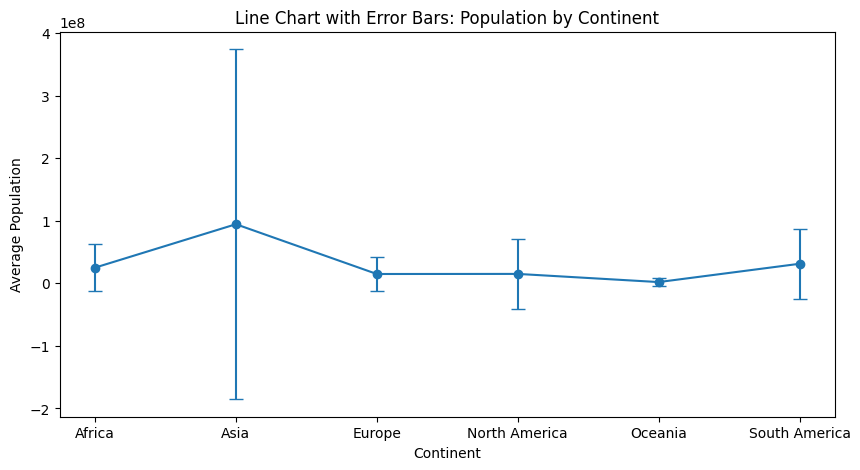

In [24]:
# Categorical & Numerical: Line Chart with Error Bars
plt.figure(figsize=(10,5))
mean_pop = df.groupby('Continent')['2022 Population'].mean()
std_pop = df.groupby('Continent')['2022 Population'].std()
plt.errorbar(mean_pop.index, mean_pop.values, yerr=std_pop.values, fmt='o-', capsize=5)
plt.title("Line Chart with Error Bars: Population by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Population")
plt.show()



In [25]:
# Categorical & Numerical: t-test for Population of Two Continents
continent1 = "Asia"
continent2 = "Europe"
pop1 = df[df['Continent'] == continent1]['2022 Population']
pop2 = df[df['Continent'] == continent2]['2022 Population']
mean_diff = abs(pop1.mean() - pop2.mean())
std_diff = np.sqrt((pop1.var() / len(pop1)) + (pop2.var() / len(pop2)))
t_stat = mean_diff / std_diff
print(f"T-test Statistic for {continent1} vs {continent2}: {t_stat}")

T-test Statistic for Asia vs Europe: 2.0018317031687647
